## Import a 311 NYC service request.

In [29]:
#Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

In [31]:
#Import the Dataset
df_NYC_dataset = pd.read_csv('C:\\Python_Dataset\\311_Service_Requests_from_2010_to_Present.csv')

D:\Data_Science_With_Python\Anaconda_installed\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## EDA

In [32]:
#View the Dataset
df_NYC_dataset.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [33]:
#View the content of the data
df_NYC_dataset.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [34]:
#Count number of records for each attribute
df_NYC_dataset.count()

Unique Key                        300698
Created Date                      300698
Closed Date                       298534
Agency                            300698
Agency Name                       300698
Complaint Type                    300698
Descriptor                        294784
Location Type                     300567
Incident Zip                      298083
Incident Address                  256288
Street Name                       256288
Cross Street 1                    251419
Cross Street 2                    250919
Intersection Street 1              43858
Intersection Street 2              43362
Address Type                      297883
City                              298084
Landmark                             349
Facility Type                     298527
Status                            300698
Due Date                          300695
Resolution Description            300698
Resolution Action Updated Date    298511
Community Board                   300698
Borough         

In [35]:
df_NYC_dataset.shape

(300698, 53)

In [36]:
df_NYC_dataset.size

15936994

In [37]:
df_NYC_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [38]:
df_NYC_dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [39]:
#Get Unique City name
df_NYC_dataset['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [40]:
#Get unique Datatype in dataset
df_NYC_dataset.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [41]:
#Find you major city names with maximum number of incidents
df_NYC_dataset.groupby('City').size().sort_values(ascending=False)

City
BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDE

In [42]:
df_NYC_dataset.groupby(['City','Complaint Type']).size()

City      Complaint Type         
ARVERNE   Animal Abuse                38
          Blocked Driveway            35
          Derelict Vehicle            27
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            11
          Derelict Vehicle             2
          Illegal Parking            100
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 764, dtype: int64

Find Major complain types

In [43]:
#complain type Value Count 
Complaint_Count= df_NYC_dataset['Complaint Type'].value_counts().head(10)
Complaint_Count

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

## Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

# Data Visualization

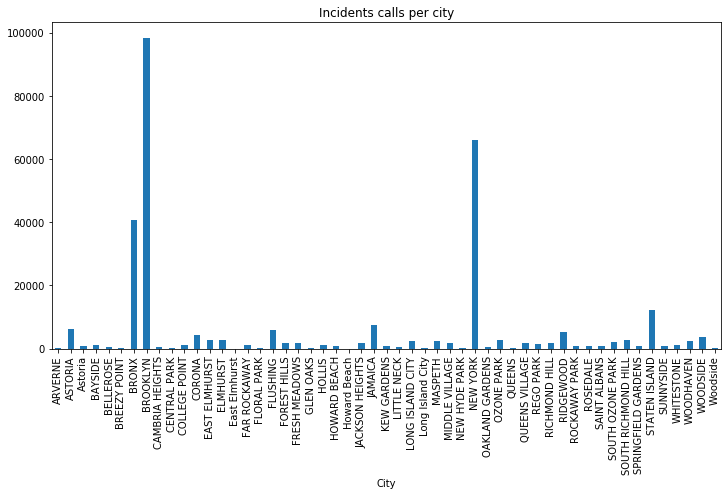

In [44]:
#A bar plot to show incidents calls per city
df_NYC_dataset.groupby('City').size().plot(kind= "bar",figsize=(12,6), title= ("Incidents calls per city"))

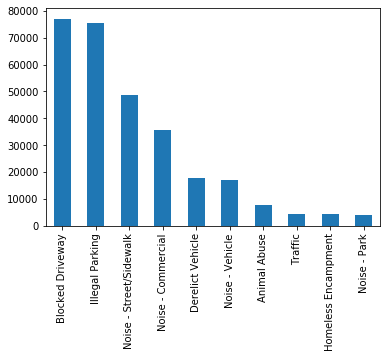

In [45]:
#Visualization the count of maximum complain type
#A bar plot graph of count vs. complain type
Complaint_Count.plot(kind= "bar")

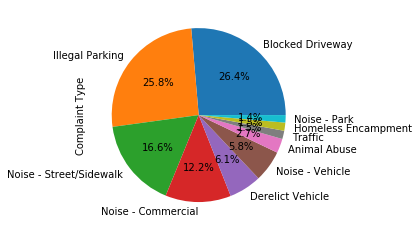

In [46]:
#Displaying the major complain type and their count using pie 
Complaint_Count.plot(kind= "pie", autopct = '%.1f%%')

Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [47]:
#View Create Date and found dtype is object.
df_NYC_dataset['Created Date']

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
                   ...          
300693    03/29/2015 12:33:41 AM
300694    03/29/2015 12:33:28 AM
300695    03/29/2015 12:33:03 AM
300696    03/29/2015 12:33:02 AM
300697    03/29/2015 12:33:01 AM
Name: Created Date, Length: 300698, dtype: object

In [50]:
# Will check the dtype to Datatime
df_NYC_dataset[['Created Date','Closed Date']] = df_NYC_dataset[['Created Date','Closed Date']].apply(pd.to_datetime)

In [51]:
#View created Date
df_NYC_dataset['Created Date']

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
300693   2015-03-29 00:33:41
300694   2015-03-29 00:33:28
300695   2015-03-29 00:33:03
300696   2015-03-29 00:33:02
300697   2015-03-29 00:33:01
Name: Created Date, Length: 300698, dtype: datetime64[ns]

In [52]:
df_NYC_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [55]:
# Check the Null value count for both the DateTime columns
df_NYC_dataset[['Created Date','Closed Date']].isna().sum()

Created Date       0
Closed Date     2164
dtype: int64

In [59]:
# Remove those records where the values of Closed_date is null
# Now we will get the new NYC Dataset with less values
df_NYC_dataset = df_NYC_dataset[pd.notnull(df_NYC_dataset['Closed Date'])]

In [60]:
# Again, check the Null value count for both the DateTime columns
df_NYC_dataset[['Created Date','Closed Date']].isna().sum()

Created Date    0
Closed Date     0
dtype: int64

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [61]:
# Time elapsed in closed and creation date
df_NYC_dataset['Request Closing Time'] = df_NYC_dataset['Closed Date']- df_NYC_dataset['Created Date']

D:\Data_Science_With_Python\Anaconda_installed\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_NYC_dataset.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request Closing Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16


In [63]:
# Now lets convert the calculated date in seconds to get better representation
df_NYC_dataset['Request Closing Time']= df_NYC_dataset['Request Closing Time']/np.timedelta64(1,'s')

D:\Data_Science_With_Python\Anaconda_installed\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_NYC_dataset['Request Closing Time']

0          3315.0
1          5176.0
2         17491.0
3         27914.0
4         12422.0
           ...   
300692     2309.0
300694     7231.0
300695    11237.0
300696    14733.0
300697    14929.0
Name: Request Closing Time, Length: 298534, dtype: float64

In [65]:
# Lets look at the descriptive statistics for the newly craeted column
df_NYC_dataset['Request Closing Time'].describe()

count    2.985340e+05
mean     1.553183e+04
std      2.192214e+04
min      6.000000e+01
25%      4.593000e+03
50%      9.775500e+03
75%      1.926000e+04
max      2.134342e+06
Name: Request Closing Time, dtype: float64

In [66]:
df_NYC_dataset['Request Closing Time'].mean()

15531.832782865604

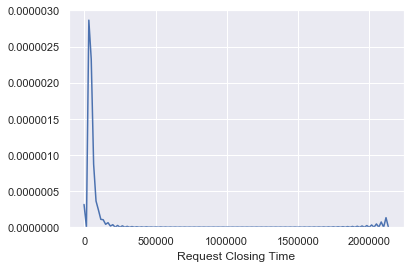

In [71]:
sns.set()
sns.distplot(df_NYC_dataset['Request Closing Time'],hist=False)
plt.show()

In [74]:
# Check the Number of Null Values in Complaint types and City
df_NYC_dataset[['City','Complaint Type']].isna().sum()

City              506
Complaint Type      0
dtype: int64

There are around 506 NA Values in the city columns

In [78]:
# Lests impute the NA value with Unknown City
df_NYC_dataset['City'].fillna('Unknown City',inplace = True)

In [79]:
# Again, Check the Number of Null Values in Complaint types and City
df_NYC_dataset[['City','Complaint Type']].isna().sum()

City              0
Complaint Type    0
dtype: int64